<a href="https://colab.research.google.com/github/Gatiwi93/Machine-Learning/blob/main/Practica1/Tree_Decision_Path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica 2

## Load libraries

In [21]:
!pip install -U skrub --quiet

In [22]:
import numpy as np
import pandas as pd
import graphviz
import seaborn

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cluster import DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skrub import SimilarityEncoder

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [23]:
url = '/content/drive/MyDrive/Recursos-ML/Producción_Cultivos_ProductosGanaderia_S_Todos_los_Datos_NOFLAG.csv'
data = pd.read_csv(url, encoding='latin1').drop(['Código del área', 'Código del área (M49)', 'Código del producto', 'Código del producto (CPC)', 'Código del elemento'], axis = 1)
print(f'Shape: {data.shape}')

Shape: (79606, 66)


In [25]:
data.head()

,Área,Producto,Elemento,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afganistán,"Aceite de girasol, en bruto",Producción,toneladas,2937.75,3137.75,3137.75,3137.75,3237.75,3437.75,...,137.68,960.46,1035.28,1804.72,3167.46,3198.89,3130.58,2511.67,2013.48,NaN
1,Afganistán,Aceite de sésamo,Producción,toneladas,2252.80,1876.00,1830.80,2722.40,2820.80,3148.80,...,1333.76,1250.00,860.89,1042.59,1107.84,1210.55,1407.67,2348.42,2096.56,NaN
2,Afganistán,"Aceite, algodón",Producción,toneladas,4997.35,7715.83,11741.71,7960.34,7926.48,6453.36,...,4761.86,4832.28,5690.84,6625.93,4176.03,6520.00,8247.33,8349.08,8199.22,NaN
3,Afganistán,"Aceite, linaza",Producción,toneladas,3531.24,3700.90,2856.68,3377.22,4326.84,4984.40,...,733.57,790.00,5374.63,18315.61,19697.71,25180.83,27185.53,15982.86,8987.86,NaN
4,Afganistán,"Aceite, oliva",Producción,toneladas,81.60,89.76,81.60,89.76,81.60,89.76,...,545.93,658.42,711.37,740.90,763.25,812.16,833.25,724.09,728.23,NaN


## Process Data

In [26]:
# Identify numerical columns (excluding specific categorical columns)
numeric_features = data.columns.difference(['Área', 'Producto', 'Elemento', 'Unidad'])

# Create pipeline for numerical data transformation
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 2))
])

# Specify categorical columns
categorical_features = ['Área', 'Producto', 'Elemento', 'Unidad']

# Create pipeline for categorical data transformation
categorical_transformer = Pipeline(steps = [
    ('similarity', SimilarityEncoder(handle_unknown = 'ignore'))
])

# Combine numerical and categorical transformations into a preprocessor
preprocessor = ColumnTransformer(transformers = [
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

# Apply preprocessing to the data
preprocessed_data = preprocessor.fit_transform(data)

In [27]:
preprocessed_dataframe = pd.DataFrame(preprocessed_data, columns = preprocessor.get_feature_names_out())
preprocessed_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79606 entries, 0 to 79605
Columns: 569 entries, numeric__pca0 to categorical__Unidad_toneladas
dtypes: float64(569)
memory usage: 345.6 MB


In [28]:
preprocessed_dataframe.head()

,numeric__pca0,numeric__pca1,categorical__Área_Afganistán,categorical__Área_Albania,categorical__Área_Alemania,categorical__Área_América central,categorical__Área_América del Sur,categorical__Área_América septentrional,categorical__Área_Américas,categorical__Área_Angola,...,categorical__Unidad_100 g/Cabeza,categorical__Unidad_100 g/ha,categorical__Unidad_100 mg/Cabeza,categorical__Unidad_1000 No.,categorical__Unidad_1000 cabezas,categorical__Unidad_Cabeza,categorical__Unidad_No.,categorical__Unidad_No./An,categorical__Unidad_ha,categorical__Unidad_toneladas
0,-0.658356,0.004852,1.0,0.085106,0.08,0.013514,0.013514,0.01087,0.018868,0.043478,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,1.0
1,-0.658601,0.004642,1.0,0.085106,0.08,0.013514,0.013514,0.01087,0.018868,0.043478,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,1.0
2,-0.656853,0.005638,1.0,0.085106,0.08,0.013514,0.013514,0.01087,0.018868,0.043478,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,1.0
3,-0.657922,0.004468,1.0,0.085106,0.08,0.013514,0.013514,0.01087,0.018868,0.043478,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,1.0
4,-0.659488,0.004297,1.0,0.085106,0.08,0.013514,0.013514,0.01087,0.018868,0.043478,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='numeric__pca0', ylabel='numeric__pca1'>

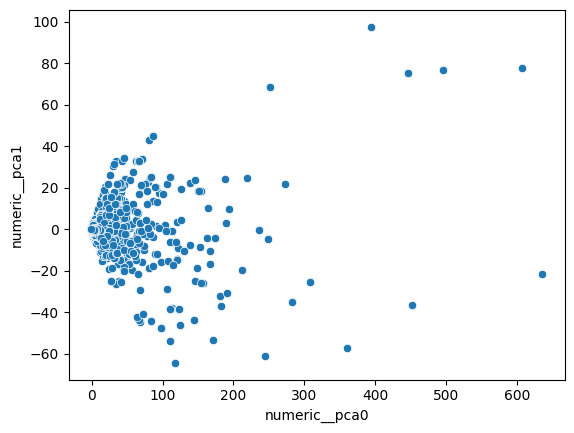

In [29]:
seaborn.scatterplot(preprocessed_dataframe, x = 'numeric__pca0', y = 'numeric__pca1')

In [30]:
dbscan = DBSCAN(min_samples = 100)

clustered_dataframe = preprocessed_dataframe.sample(n = 30000, random_state = 42)
clustered_dataframe['cluster'] = dbscan.fit_predict(clustered_dataframe[['numeric__pca0', 'numeric__pca1']])

<Axes: xlabel='numeric__pca0', ylabel='numeric__pca1'>

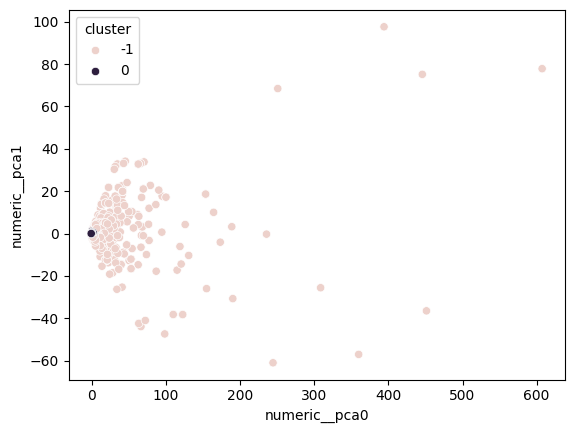

In [31]:
seaborn.scatterplot(clustered_dataframe, x = 'numeric__pca0', y = 'numeric__pca1', hue = 'cluster')

In [32]:
clustered_dataframe[clustered_dataframe['cluster'] == -1].shape

(1010, 570)

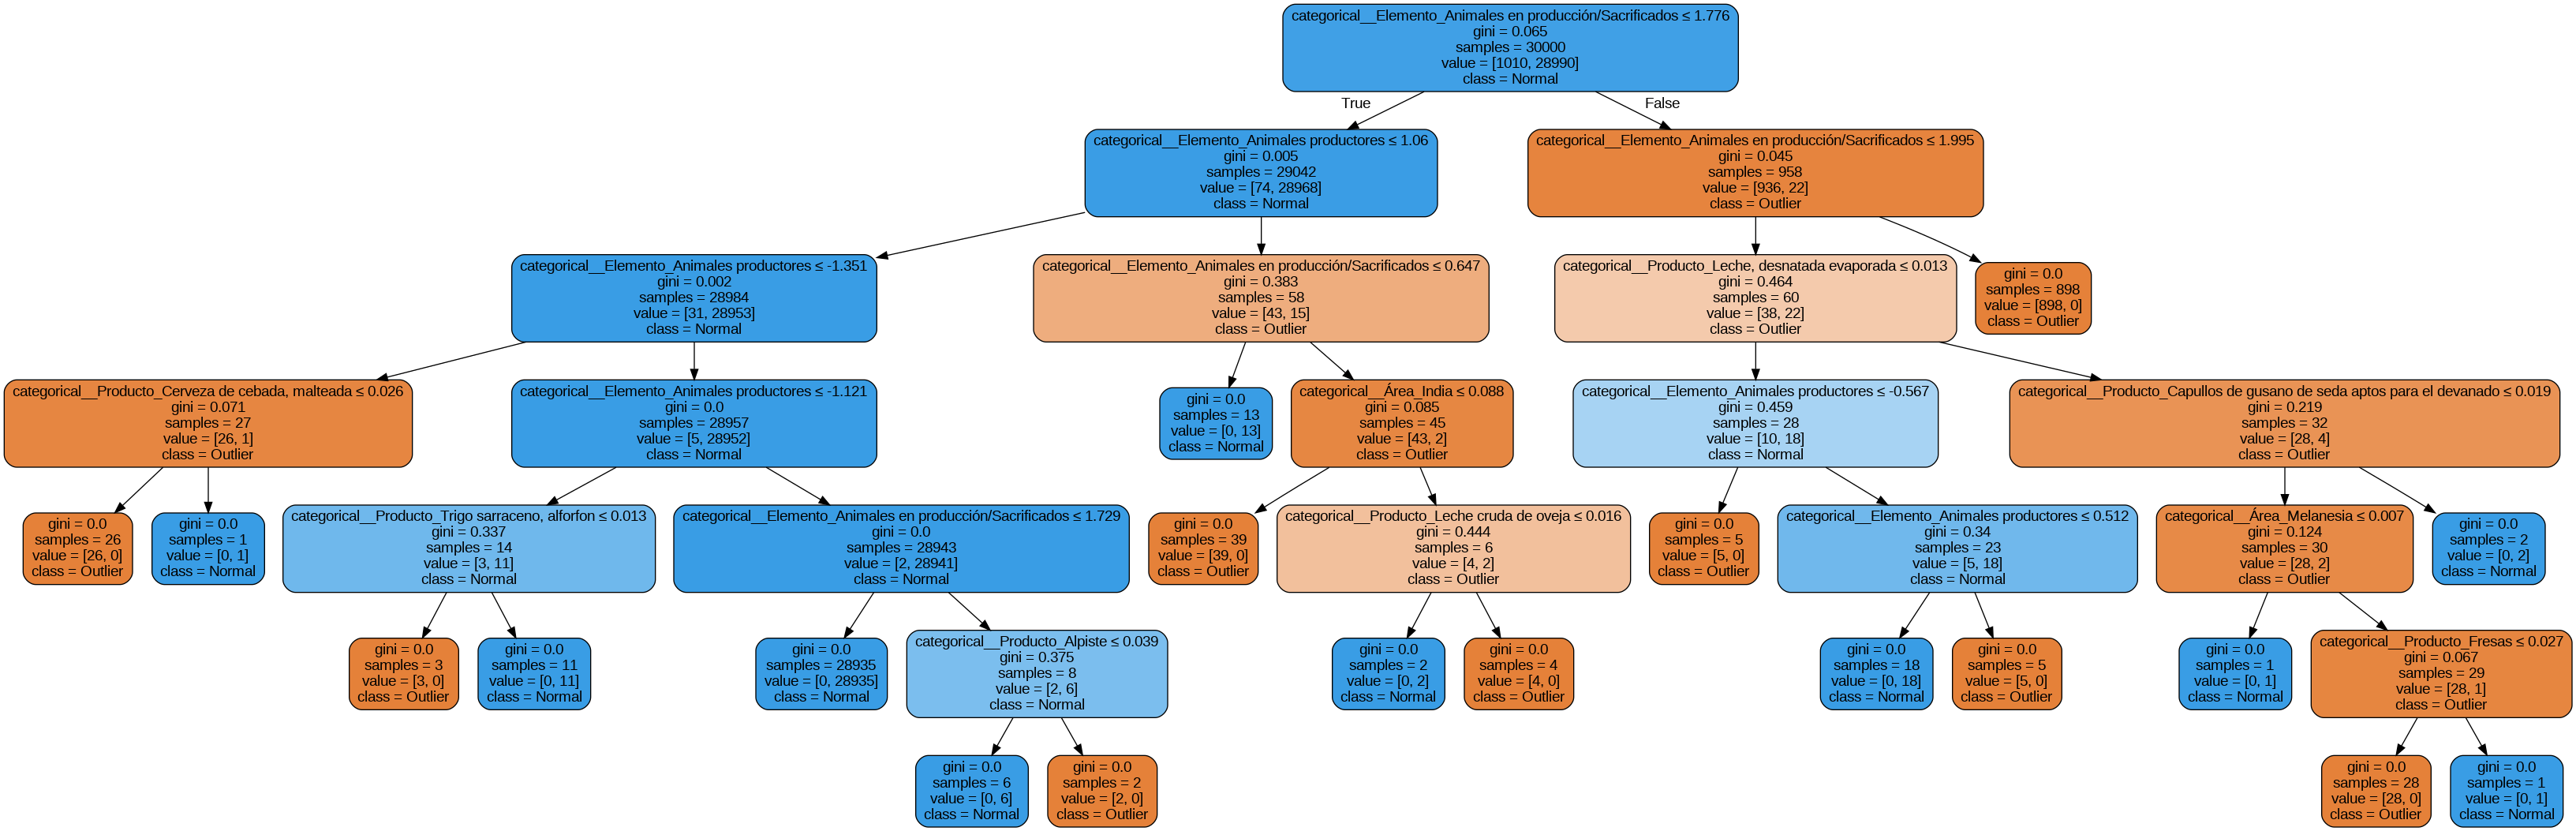

In [33]:
outlier_tree = DecisionTreeClassifier(random_state = 42)
outlier_tree.fit(clustered_dataframe.drop('cluster', axis = 1), clustered_dataframe['cluster'])

dot_data = export_graphviz(
    outlier_tree,
    feature_names = clustered_dataframe.columns.difference(['cluster']),
    class_names = ['Outlier', 'Normal'],
    filled = True, rounded = True, special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render(filename = '/mnt/data/tree', format = 'png', cleanup = True)

from IPython.display import Image
Image(filename = '/mnt/data/tree.png')